# Histograms

A histogram is a bar chart which shows the frequency of a given phenomena.

A great example are probability distributions. For instance, in the first course in this specialization, we touched on the difference between the random, uniform, normal, and chi squared distributions.

Probability functions can be visualized as a curve, where the y-axis holds the probability a given value would occur, and the x-axis is the value itself. This is called a probability density function. The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur.

The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.

So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

Now, recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution. Let's quit talking about this and do a bit of coding to see it in action.

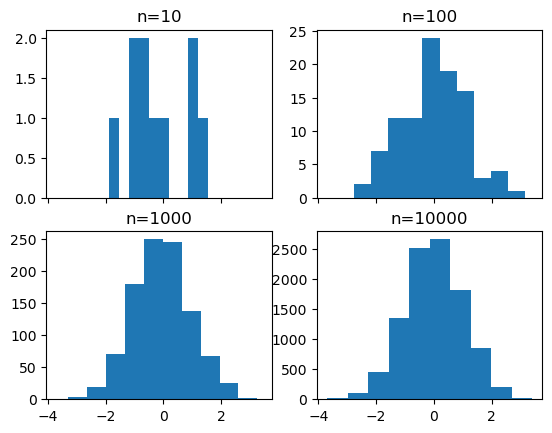

In [15]:
# I'm going to bring in matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Let's pull some samples from the normal distribution and plot four different histograms as subplots. First I'll 
# create our 2 x 2 grid of axis objects. In this case, we don't want to share the y-axis between the plots since 
# we're intentionally looking at a number of different sizes of samples.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# We're mostly interested in how uniform the distribution looks. Then we can iterate through a list of four 
# different values, 10, 100, 1,000 and 10,000. And we'll pull samples from the NumPy. Remember that the normal 
# function of random just creates a list of numbers based on the underlying normal distribution.

# So iterate through each axis
for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Well, there we go. The first plot only has ten samples, so it looks pretty jagged. And in my version here I don't think anyone would say this is obviously a normal distribution. When we jump to 100 samples, it gets better, but still quite jagged. Then it seems to smooth out a bit on the plots for 1,000 and 10,000 samples.

But if we look closely, we can see that the bar of the 10,000 plots are actually wider than those of the 10 or the 100 plot. What's going on here?

By default, the histogram in Matplotlib uses ten bins, that is ten different bars. Here we created a shared x-axis, and as we sample more from the distribution, we're more likely to get outlier values further from our mean. Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be combined into a single bin. Let's do the same function with the bin set to 100

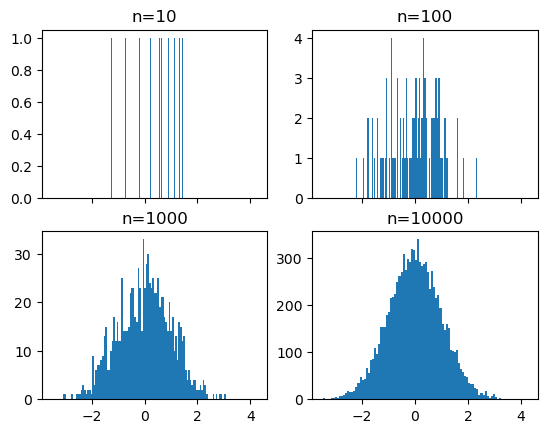

In [16]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample, bins=100)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

Now we see that the 10,000 sampled plot looks much smoother than all of the others. And the 10 sample plot shows that each sample is basically in its own bin.

So I think this brings up an important question of how many bins you should plot when using a histogram. I'm afraid that the answer isn't really clear. Both of these plots are true, one is a visual of the data at a coarse granularity, and one at a more fine grain granularity. When we look at the finest granularity in our data, plotting with 10,000 bins then the histograms became basically useless for decision making. Since they aren't showing trends between samples as much as they're just showing the sample size themselves. This is similar to using aggregate statistics like the mean in standard deviation to describe a sample of a population. These values are coarse and whether they are appropriate depends highly on your questions and interests.

I want to use our newfound knowledge of histograms and subplots to introduce you to a more flexible GridSpec layout for subplots. The GridSpec allows you to map axes over multiple cells in a grid.

For instance, let's create a scatter plot where the y values come from the normal distribution, and the x values come from a random distribution.

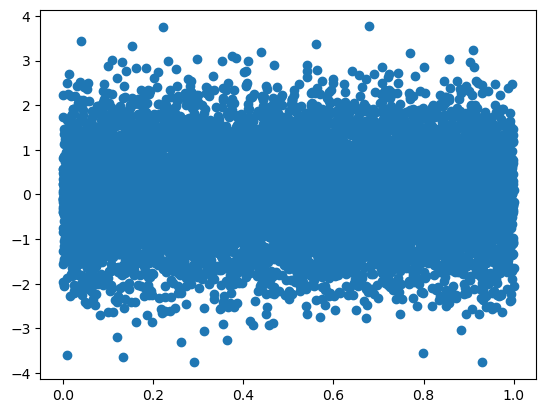

In [17]:
# Just a bunch of random data being created here
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y);

It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear. Let's dive right in -- I'm going to define a 3x3 grid, nine cells in total. I want the first histogram to take up the top right space, and the second histogram to take up the far left bottom two spaces, rotated on its side. The original scatter plot can take up a two by two square in the bottom right.

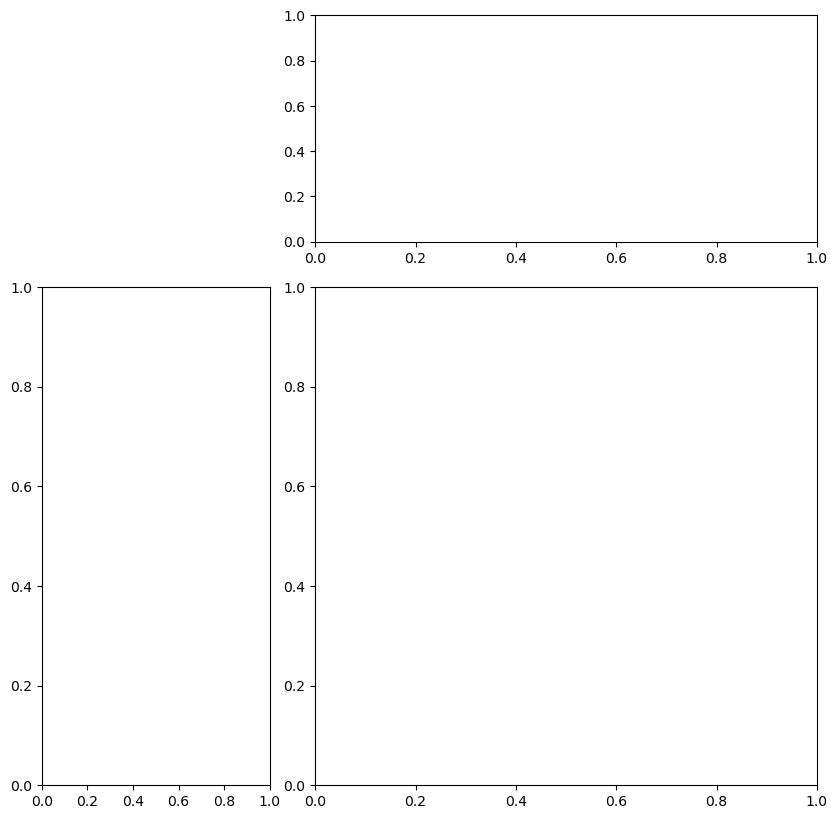

In [18]:
# To use the GridSpec, we first import it, then create a new GridSpec of the overall shape that we want.
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# When we add new items with the subplot, instead of specifying the three numbers of row, column and position, 
# we pass in the elements of the GridSpec object which we wish to cover. And very important here. Because 
# we are using the elements of a list, all of the indexing starts at zero, and is very reasonable to use 
# slicing for the beginning or ends of lists.

# The GridSpec is indexed as rows and columns using the indexing operator, or square brackets. So we'll 
# create the first subplot and histogram in row 0, covering off the first element, the middle position, 
# and going to the end of the row.
top_histogram = plt.subplot(gspec[0, 1:])

# We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to 
# the 0 column.
side_histogram = plt.subplot(gspec[1:, 0])

# Finally we'll create the scatter plot in the lower_right. When we execute this, we see our basic set of 
# plots, great.
lower_right = plt.subplot(gspec[1:, 1:])

Now, let's fill this with some data. First the scatter plot, then the top histogram, which is for the x values, then the side histogram for the y values.

And we want the side histogram to be lined up, so let's rotate the layout by setting the orientation. There are actually a few ways of doing this, but since it's so common, Matplotlib has an orientation parameter which we can set to horizontal.

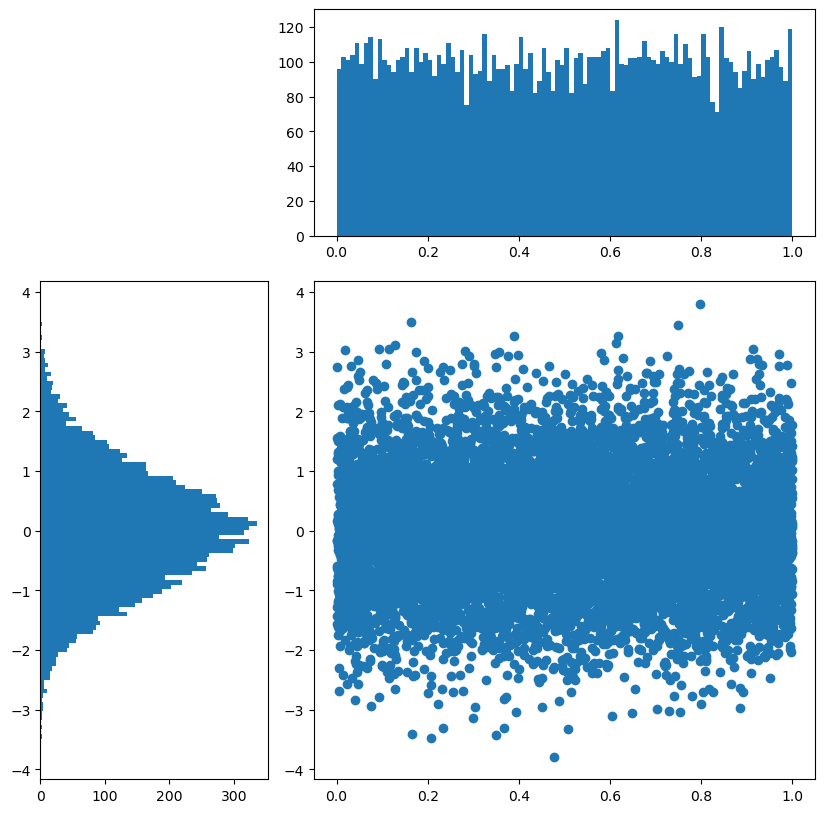

In [19]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

It becomes immediately clear that we have two different distributions! Now we don't really care about the value of the y-axes for the top histogram or the value of the x-axes for the bottom histogram. Since these are probability density histograms, we care only about the relative values, and in matplotlib we can do this be indicating that our histograms are `density=True`. We can also invert the xaxis subplot for the histogram on the left hand side, which makes is (perhaps) more clear that it represents the data in the right hand side. We do this directly using the `invert_xaxis` function on the axis. Finally, we can see that our axes have a bit of whitespace padding on the left and right which seems unneccessary. So we can get rid of this by changing our axes limits.

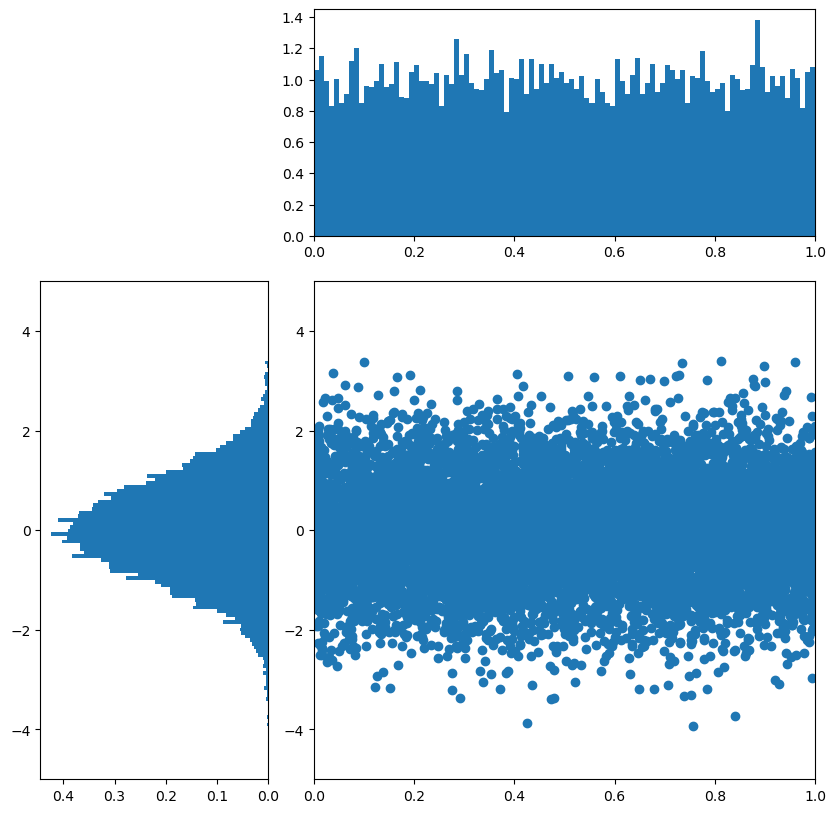

In [20]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot, making it clear this is a density function
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100,  density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal',  density=True);

# Flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits to get rid of whitespace
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

And there we go. We can see that our top histogram is random, pretty uniform, and that the histogram for the y values indeed looks like the normal distribution.

In fact, this image looks sort of crudely like the image we looked at in the first module of this course, from the MIT and Harvard study on MOOC engagement. And it should be pretty clear to you now how we might adjust various aspects of this plot so that if we wanted to look even more like that engagement image, we could. Actually, why don't you try it? Do you think you could add titles to these subplots, that are similar to the one from the MIT and Harvard publication? Or change the individual point sizes because we're dealing with big data? How about the styling, could you change the colors of the plots to mimic the one from MIT and Harvard? Give your new found matplotlib skills a try.

![MOOC DATA](assets/moocdata.png "image")